# Unsupervised Learning and Linear Programming

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data 
audit_data = pd.read_csv('SupplierAuditData.csv')
characteristics_data = pd.read_csv('SupplierCharacteristics.csv')

# Display the first few rows of each dataframe to understand their structures
audit_data.head(), characteristics_data.head()


(   Month SUP_ID  Defects  Delivery  Unit_Cost  Flexibility
 0      1  SUP_1     16.6         5      25.62          5.5
 1      2  SUP_1      4.7        11      26.61          1.7
 2      3  SUP_1      5.1         1      33.81          0.6
 3      4  SUP_1     17.4         7      33.62          3.2
 4      5  SUP_1      4.5         5      42.11          2.5,
    SUP_ID Location Partnership Size
 0   SUP_1        D           I    L
 1  SUP_10        G           I    L
 2  SUP_11        D           I    M
 3  SUP_12        D           P    L
 4  SUP_13        G           I    S)

In [12]:
# Group by supplier and calculate the required statistics
stats = audit_data.groupby('SUP_ID').agg(
    avg_defects=pd.NamedAgg(column='Defects', aggfunc='mean'),
    std_defects=pd.NamedAgg(column='Defects', aggfunc='std'),
    avg_cost=pd.NamedAgg(column='Unit_Cost', aggfunc='mean'),
    std_cost=pd.NamedAgg(column='Unit_Cost', aggfunc='std'),
    avg_delivery_time=pd.NamedAgg(column='Delivery', aggfunc='mean'),
    avg_flexibility=pd.NamedAgg(column='Flexibility', aggfunc='mean')
)

# Reset the index to make SUP_ID a column again
stats.reset_index(inplace=True)
stats.head()


,SUP_ID,avg_defects,std_defects,avg_cost,std_cost,avg_delivery_time,avg_flexibility
0,SUP_1,9.345000,4.578262,30.534167,4.960600,4.750000,2.058333
1,SUP_10,9.855000,5.328193,19.745333,4.772947,34.950000,1.825000
2,SUP_11,19.711667,11.547113,25.355417,7.257808,4.800000,5.615000
3,SUP_12,9.873333,1.013781,35.006000,1.047575,4.933333,1.848333
4,SUP_13,31.048333,4.458832,19.969833,2.087725,35.283333,8.913333


In [13]:
# Prepare the data for clustering
features = stats[['avg_defects', 'std_defects', 'avg_cost', 'std_cost', 'avg_delivery_time', 'avg_flexibility']]

# Initialize and fit the KMeans algorithm with k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(features)

# Cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
cluster_centers


,avg_defects,std_defects,avg_cost,std_cost,avg_delivery_time,avg_flexibility
0,30.2395,5.032960,20.199267,2.002172,34.840000,5.597500
1,9.8500,1.608203,34.275972,1.693151,4.844444,2.024444
2,9.8250,4.754684,20.149700,5.174217,35.583333,2.004667
3,21.8630,9.962426,24.046567,6.719888,4.768333,6.192000


### Interpretation of Clusters:

#### Cluster 0 (Low Cost, High Delivery Time): 
This cluster is characterized by relatively low average defects and cost, with high standard deviation in cost and significantly longer delivery times. Suppliers in this cluster offer economical options but at the cost of slower delivery.

#### Cluster 1 (High Cost, Low Defect Variability): 
Suppliers in this cluster have high costs and low defect variability, suggesting they offer high-quality and consistent products but at a premium price. Their delivery times are also very short, indicating efficient processes.

#### Cluster 2 (High Defects, High Flexibility):
This cluster features suppliers with the highest defects but also high flexibility. These suppliers adapt to different requirements, although quality control could be an issue.

#### Cluster 3 (Moderate Cost, High Quality Variability): 
Suppliers in this cluster have moderate costs, high variability in quality, and are relatively flexible. They also manage to maintain short delivery times. These suppliers could be suitable for projects where flexibility and quick delivery are more critical than consistently low defect rates.




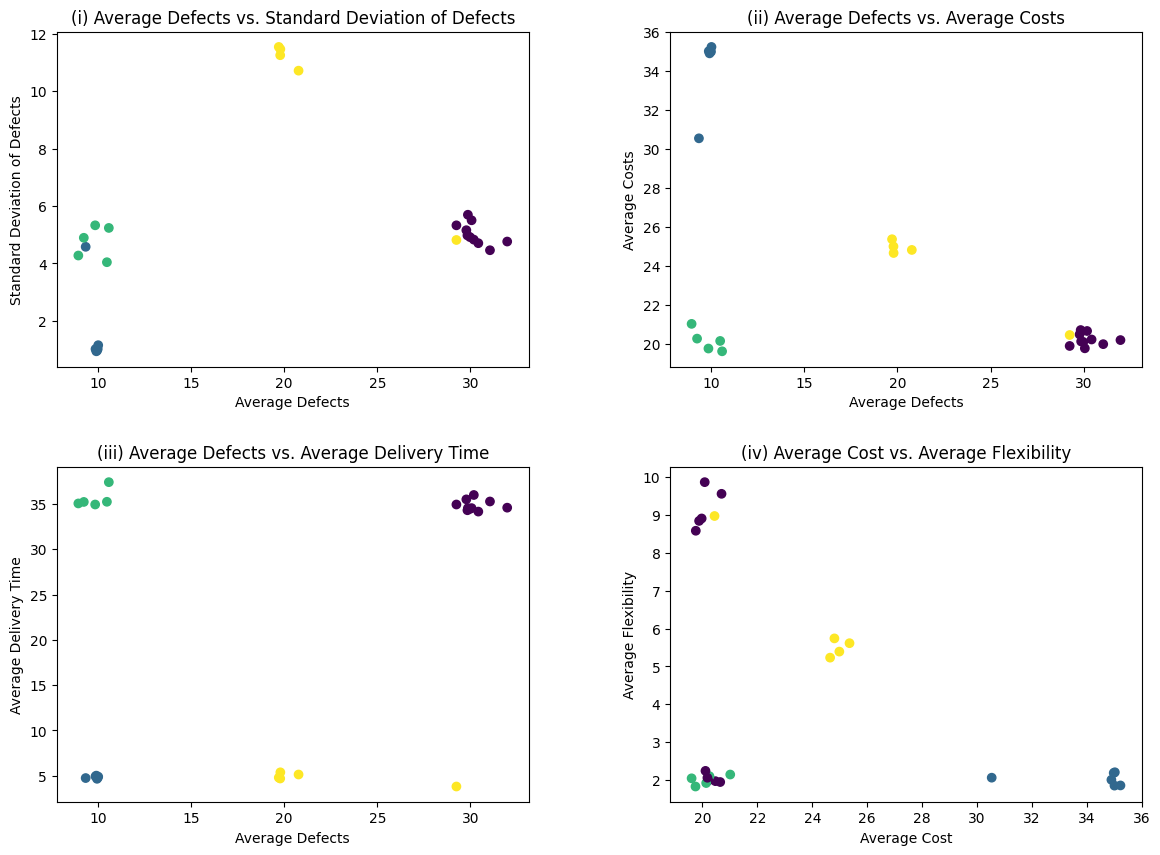

In [16]:
# Plotting

clusters = kmeans.predict(features)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Plot 1: Average Defects vs. Standard Deviation of Defects
axs[0, 0].scatter(stats['avg_defects'], stats['std_defects'], c=clusters, cmap='viridis')
axs[0, 0].set_title('(i) Average Defects vs. Standard Deviation of Defects')
axs[0, 0].set_xlabel('Average Defects')
axs[0, 0].set_ylabel('Standard Deviation of Defects')

# Plot 2: Average Defects vs. Average Costs
axs[0, 1].scatter(stats['avg_defects'], stats['avg_cost'], c=clusters, cmap='viridis')
axs[0, 1].set_title('(ii) Average Defects vs. Average Costs')
axs[0, 1].set_xlabel('Average Defects')
axs[0, 1].set_ylabel('Average Costs')

# Plot 3: Average Defects vs. Average Delivery Time
axs[1, 0].scatter(stats['avg_defects'], stats['avg_delivery_time'], c=clusters, cmap='viridis')
axs[1, 0].set_title('(iii) Average Defects vs. Average Delivery Time')
axs[1, 0].set_xlabel('Average Defects')
axs[1, 0].set_ylabel('Average Delivery Time')

# Plot 4: Average Cost vs. Average Flexibility
axs[1, 1].scatter(stats['avg_cost'], stats['avg_flexibility'], c=clusters, cmap='viridis')
axs[1, 1].set_title('(iv) Average Cost vs. Average Flexibility')
axs[1, 1].set_xlabel('Average Cost')
axs[1, 1].set_ylabel('Average Flexibility')

plt.show()

#### (i) Average Defects vs. Standard Deviation of Defects:

Observation: Clusters in this plot suggest varying levels of defect predictability. Some clusters show low variability in defects despite a range of average defects, while others show high variability.
Insight: Suppliers in the cluster with lower standard deviation (more consistent defect rates) could be more reliable, despite their average defect rates.

#### (ii) Average Defects vs. Average Costs:

Observation: There appears to be a slight positive correlation in some clusters between defect rates and costs, which is counterintuitive.
Insight: This indicates that higher costs do not necessarily equate to lower defects, or it means that some suppliers manage quality differently.

#### (iii) Average Defects vs. Average Delivery Time:

Observation: Higher defects seem to correlate with shorter delivery times in some clusters.
Insight: This suggests a trade-off between speed and quality, where faster deliveries come at the expense of higher defects.

#### (iv) Average Cost vs. Average Flexibility:

Observation: There's notable separation between clusters, particularly with one showing high cost and high flexibility.
Insight: Suppliers that cost more tend to offer more flexibility, potentially justifying higher prices with better service or adaptability.

In [31]:
stats['Cluster'] = clusters
data_for_clustering = stats
clustered_data = data_for_clustering[['SUP_ID', 'Cluster']].merge(characteristics_data, on='SUP_ID', how='left')
# Generate crosstabulations for clusters against size, partnerships, and location
# Table (i) Clusters against Size
cluster_size = pd.crosstab(clustered_data['Cluster'], clustered_data['Size'])

# Table (ii) Clusters against Partnerships
cluster_partnership = pd.crosstab(clustered_data['Cluster'], clustered_data['Partnership'])

# Table (iii) Clusters against Location
cluster_location = pd.crosstab(clustered_data['Cluster'], clustered_data['Location'])

# Display the tables
print("Clusters vs Size:\n", cluster_size)
print("\nClusters vs Partnerships:\n", cluster_partnership)
print("\nClusters vs Location:\n", cluster_location)

Clusters vs Size:
 Size     L  M  S
Cluster         
0        5  0  5
1        6  0  0
2        5  0  0
3        0  4  1

Clusters vs Partnerships:
 Partnership   I  P
Cluster           
0            10  0
1             1  5
2             5  0
3             5  0

Clusters vs Location:
 Location  D   G
Cluster        
0         0  10
1         6   0
2         0   5
3         5   0


#### Clusters vs Size:

Clusters 0, 1, and 2 predominantly consist of large suppliers, while Cluster 3 is mainly composed of medium to small suppliers. This indicates that larger suppliers tend to fall into distinct operational clusters, due to their scale influencing their operational metrics. Cluster 3's composition suggests that smaller suppliers might have more variability in defects and flexibility.

#### Clusters vs Partnerships:

Cluster 0 is exclusively composed of independent suppliers, while Cluster 1 has a majority of suppliers in partnerships. This suggests that independent suppliers in Cluster 0 might have higher defects and lower costs, due to less collaboration or resource sharing that partnerships might offer. Cluster 1 suppliers, in partnerships, show better quality and higher costs, potentially benefiting from shared expertise and resources.

#### Clusters vs Location:

Clusters are distinctly split by location. Cluster 0 and 2 suppliers are exclusively from Location G, while Clusters 1 and 3 suppliers are from Location D. This segregation by location could indicate regional differences in operations, influenced by local regulations, market conditions, or logistical factors.



# Linear Programming 

In [67]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum

# Initialize the problem
model = LpProblem("Minimize_Total_Cost", LpMinimize)

# Define the decision variables
x = {
    ('S1', 'D1'): LpVariable('x_S1_D1', lowBound=0),
    ('S1', 'D2'): LpVariable('x_S1_D2', lowBound=0),
    ('S1', 'R1'): LpVariable('x_S1_R1', lowBound=0),
    ('S1', 'R2'): LpVariable('x_S1_R2', lowBound=0),
    ('S1', 'R3'): LpVariable('x_S1_R3', lowBound=0),
    ('S2', 'D1'): LpVariable('x_S2_D1', lowBound=0),
    ('S2', 'D2'): LpVariable('x_S2_D2', lowBound=0),
    ('S2', 'R1'): LpVariable('x_S2_R1', lowBound=0),
    ('S2', 'R2'): LpVariable('x_S2_R2', lowBound=0),
    ('S2', 'R3'): LpVariable('x_S2_R3', lowBound=0),
    ('D1', 'R1'): LpVariable('x_D1_R1', lowBound=0),
    ('D1', 'R2'): LpVariable('x_D1_R2', lowBound=0),
    ('D1', 'R3'): LpVariable('x_D1_R3', lowBound=0),
    ('D2', 'R1'): LpVariable('x_D2_R1', lowBound=0),
    ('D2', 'R2'): LpVariable('x_D2_R2', lowBound=0),
    ('D2', 'R3'): LpVariable('x_D2_R3', lowBound=0),
}

# Manufacturing costs
man_costs = {
    'S1': 2000,
    'S2': 2400
}

# Total manufacturing cost
total_manufacturing_cost = lpSum(man_costs['S1'] * x[('S1', dest)] for dest in ['D1', 'D2', 'R1', 'R2', 'R3']) + \
                           lpSum(man_costs['S2'] * x[('S2', dest)] for dest in ['D1', 'D2', 'R1', 'R2', 'R3'])

total_manufacturing_cost


2000*x_S1_D1 + 2000*x_S1_D2 + 2000*x_S1_R1 + 2000*x_S1_R2 + 2000*x_S1_R3 + 2400*x_S2_D1 + 2400*x_S2_D2 + 2400*x_S2_R1 + 2400*x_S2_R2 + 2400*x_S2_R3 + 0

## 2. Total Transportation Cost in Terms of Decision Variables

In [69]:
# Transportation costs (from the table provided)
trans_costs = {
    ('S1', 'D1'): 150,
    ('S1', 'D2'): 200,
    ('S1', 'R1'): 325,
    ('S1', 'R2'): 260,
    ('S1', 'R3'): 390,
    ('S2', 'D1'): 400,
    ('S2', 'D2'): 350,
    ('S2', 'R1'): 585,
    ('S2', 'R2'): 650,
    ('S2', 'R3'): 520,
    ('D1', 'R1'): 65,
    ('D1', 'R2'): 65,
    ('D1', 'R3'): 97.5,
    ('D2', 'R1'): 97.5,
    ('D2', 'R2'): 32.5,
    ('D2', 'R3'): 32.5
}

# Total transportation cost
total_transportation_cost = lpSum(trans_costs[(orig, dest)] * x[(orig, dest)] for orig, dest in x)

total_transportation_cost



65*x_D1_R1 + 65*x_D1_R2 + 97.5*x_D1_R3 + 97.5*x_D2_R1 + 32.5*x_D2_R2 + 32.5*x_D2_R3 + 150*x_S1_D1 + 200*x_S1_D2 + 325*x_S1_R1 + 260*x_S1_R2 + 390*x_S1_R3 + 400*x_S2_D1 + 350*x_S2_D2 + 585*x_S2_R1 + 650*x_S2_R2 + 520*x_S2_R3 + 0.0

## 3. Total Cost of Manufacturing and Transportation

In [70]:
# Objective function
model += total_manufacturing_cost + total_transportation_cost


## 4. Constraints for the Problem

In [71]:
# Demand constraints
model += lpSum(x[('S1', 'R1')] + x[('S2', 'R1')] + x[('D1', 'R1')] + x[('D2', 'R1')]) == 1500, "Demand_R1"
model += lpSum(x[('S1', 'R2')] + x[('S2', 'R2')] + x[('D1', 'R2')] + x[('D2', 'R2')]) == 2000, "Demand_R2"
model += lpSum(x[('S1', 'R3')] + x[('S2', 'R3')] + x[('D1', 'R3')] + x[('D2', 'R3')]) == 1000, "Demand_R3"

# Flow balance constraints
model += lpSum(x[('S1', 'D1')] + x[('S2', 'D1')] - (x[('D1', 'R1')] + x[('D1', 'R2')] + x[('D1', 'R3')])) == 0, "Flow_D1"
model += lpSum(x[('S1', 'D2')] + x[('S2', 'D2')] - (x[('D2', 'R1')] + x[('D2', 'R2')] + x[('D2', 'R3')])) == 0, "Flow_D2"


## 5. Solve the Linear Programming Problem

In [72]:
# Solve the problem
status = model.solve()

# Print the status of the solution
print(f"Status: {model.status}, {LpStatus[model.status]}")

# Print the optimal values of the decision variables
for var in x:
    print(f"{x[var].name} = {x[var].varValue}")

# Print the optimal total cost
print(f"Total Cost = {value(model.objective)}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/panshulsaraswat/Library/Python/3.9/lib/python/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/xt/sj1wfv795tgfwwl993wgvjhh0000gn/T/030565f5187d45938030cad02ed3b8a1-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/xt/sj1wfv795tgfwwl993wgvjhh0000gn/T/030565f5187d45938030cad02ed3b8a1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 49 RHS
At line 55 BOUNDS
At line 56 ENDATA
Problem MODEL has 5 rows, 16 columns and 22 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-5) rows, 0 (-16) columns and 0 (-22) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 9985000
After Postsolve, objective 9985000, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 9985000 - 0 iterations time 0.002, Presolve 0.00
Option for pri

Network Overview and Results: The network comprises two suppliers (S1 and S2), two warehouses (D1 and D2), and three retailers (R1, R2, and R3). The primary objective is to minimize the total cost, which includes manufacturing and transportation expenses, while adequately fulfilling the demands of the retailers.

Operational Details:
•	Supplier S1 supplies all the units needed by both warehouses:
•	𝑥(𝑆1,𝐷1)=3500.0x(S1,D1)=3500.0: S1 to D1
•	𝑥(𝑆1,𝐷2)=1000.0x(S1,D2)=1000.0: S1 to D2
•	Warehouses D1 and D2 distribute units to the retailers:
•	𝑥(𝐷1,𝑅1)=1500.0x(D1,R1)=1500.0: D1 to R1
•	𝑥(𝐷1,𝑅2)=2000.0x(D1,R2)=2000.0: D1 to R2
•	𝑥(𝐷2,𝑅3)=1000.0x(D2,R3)=1000.0: D2 to R3

Cost and Efficiency Analysis:
•	Total Cost: The operation's total cost is $9,985,000, which likely includes both manufacturing at the suppliers and transporting items throughout the network.

Efficiency and Usage:
•	S1 is the exclusive supplier in use, implying a significant cost or capacity advantage.
•	S2 remains unused, suggesting that its associated costs or logistical constraints make it less viable under the current model.
•	Warehouses function effectively as intermediaries, ensuring no direct shipments from suppliers to retailers, which aligns with strategies to       minimize transportation costs.

Strategic Insights: The optimal network design indicates that centralizing supply from S1 and efficiently using both warehouses to meet retailer demands leads to significant cost savings. The absence of direct shipments from suppliers to retailers and no utilization of S2 are strategic choices that likely contribute to the overall cost-efficiency. This arrangement highlights the network's robustness in logistics and supply chain management, ensuring demands are met efficiently without incurring unnecessary expenses.

Conclusion: This setup, by optimizing the flow of goods from suppliers through warehouses to retailers, ensures that the supply chain operates at the lowest possible cost while meeting required demand levels. It showcases a streamlined, effective approach to distribution logistics, maximizing efficiency and potentially providing a model for scaling or adapting operations in response to changes in demand or cost structure.

